##Librerias

In [1]:
import math
import time
import pandas as pd
from pandas import ExcelWriter
import numpy as np
import matplotlib.pyplot as plt

Continuos Methods: Mean Square 

Crear variables aleatorias CONTINUAS

In [2]:
def meanSquare(seed, n, show=False):
    if seed < 1000 or seed > 9999:
        return

    random_numbers = []

    for i in range(n):
        seed_squared = seed**2
        str_seed_squared = str(seed_squared)
        long_square_seed = len(str_seed_squared)

        sub_str = ""

        if(long_square_seed < 8):
            aux_long_square_seed = 0
            while aux_long_square_seed < 8:
                str_seed_squared = "0" + str_seed_squared
                aux_long_square_seed = len(str_seed_squared)

        sub_str = str_seed_squared[2:6]
        value = int(sub_str)
        random = value / 10000

        if(show):
            print(
                f'INFO: {i}. Seed Xo: {seed}  Xo²: {str_seed_squared}  Long: {long_square_seed}  pseudorandom: {value}  Random Ri: {random}')

        seed = value
        random_numbers.append(random)
        if value == 0:
            break

    return random_numbers

Continuos Methods: Mixed Congruential Method

In [3]:
def mixedCongruentialMethod(xo_seed = 5, m_module = 2**4,c_additive_constant = 7, a_multiplier = 5,to = 10):
    xn1 = 0
    pseudo = 0
    numbers = []

    for _ in range(to):
        xo_seed = a_multiplier * xo_seed + c_additive_constant
        xn1 = xo_seed % m_module
        pseudo = (xn1 + 0.5) / m_module

        if(pseudo < 0):
            pseudo *=(-1)
            
        numbers.append(pseudo)
    return numbers

Poisson Distribution - Discretos

In [4]:
def probability_mass_funtion(mean, k):
    pmf = []
    for i in range(k):
        pmf.append(float(((mean**i)*math.exp(-mean))/math.factorial(i)))
    return pmf

def cumulative_distribution_funtion(pmf):
    
    cdf =[]
    for i in range(len(pmf)):
        if i ==0:
            cdf.append(pmf[i])
        else:
            cdf.append(pmf[i]+cdf[i-1])
    return cdf

def distribution_criteria(fcp):
    condition = []
    parameter1 = []
    parameter2 = []
    Range = []    
    for i in range(len(fcp)):
        if i == 0:
            print(f'{i} hasta {fcp[i]} rango {i}')
            parameter1.append(i)
            condition.append('hasta')
            parameter2.append(fcp[i])
            Range.append(f'{i}')
        else: 
            print(f'{fcp[i-1]} hasta {fcp[i]} rango {i}')
            parameter1.append(fcp[i-1])
            condition.append('hasta')
            parameter2.append(fcp[i])
            Range.append(f'{i}')
    
    data = pd.DataFrame()
    data['parametro 1'] = parameter1
    data['Condicion'] = condition
    data['Parametro 2'] = parameter2
    data['Range'] = Range    
    return data

# generamos los datos discretos

def distribution_Poisson(fcp, pseudoAleatorios): 
    Xi =[]
    for i in range(len(pseudoAleatorios)):
        cont = 0
        for j in range(len(fcp)):
            if fcp[j] < pseudoAleatorios[i]: 
                if cont < (len(fcp)-1):
                    cont = cont+1

        Xi.append(cont) 
    return Xi

Generamos las probabilidades

In [5]:
pmf = probability_mass_funtion(8,15)
cdf = cumulative_distribution_funtion(pmf)

poissonData = pd.DataFrame()
poissonData['Funcion masa de probabilidad'] = pmf
poissonData['Funcion de distribucion acumulativa'] = cdf
poissonData.head(100)


,Funcion masa de probabilidad,Funcion de distribucion acumulativa
0,0.000335,0.000335
1,0.002684,0.003019
2,0.010735,0.013754
3,0.028626,0.042380
4,0.057252,0.099632
5,0.091604,0.191236
6,0.122138,0.313374
7,0.139587,0.452961
8,0.139587,0.592547
9,0.124077,0.716624


Guardamos los datos en excel

In [6]:
dataP = pd.DataFrame({'Funcion masa de probabilidad':pmf,'Funcion de distribucion acumulativa':cdf})
writer = ExcelWriter('D:/SEMESTRE 13/PROBABILISTICOS/numerosAleatorios/datosProbabilidades.xlsx')
dataP.to_excel(writer, 'Probabilidades', index=True)
writer.save()

C:\Users\julia\AppData\Local\Temp\ipykernel_11464\1755217522.py:4: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


Generamos los numeros con la distribucion de poisson

In [7]:
# generamos pseudoaleatorios a partir del MCM (metodo congruencial mixto)
SEED = int(time.time())
Ri = mixedCongruentialMethod(xo_seed = SEED)

dp = distribution_Poisson(cdf, Ri)

poissonDataP = pd.DataFrame()
poissonDataP['Pseudoaleatorios'] = Ri
poissonDataP['Distribution Poisson'] = dp
poissonDataP.head()

,Pseudoaleatorios,Distribution Poisson
0,0.46875,8
1,0.65625,9
2,0.59375,9
3,0.28125,6
4,0.71875,10


Guardamos los datos resultantes de la Distribucion de Poisson

In [8]:
dataP = pd.DataFrame({'Ri (pseudoaleatorios)':Ri,'Valores Distribucion Poisson':dp})
writer = ExcelWriter('D:/SEMESTRE 13/PROBABILISTICOS/numerosAleatorios/datosDistribucionPoisson.xlsx')
dataP.to_excel(writer, 'DistribucionPoisson', index=True)
writer.save()

C:\Users\julia\AppData\Local\Temp\ipykernel_11464\60736963.py:4: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


Graficamos Distribucion de Poisson

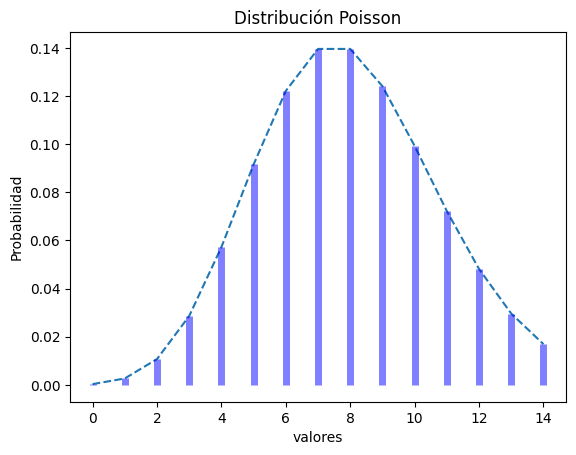

In [9]:
rango = np.arange(15)

plt.plot(rango,pmf, '--')
plt.vlines(rango,0,pmf,color='b',lw=5,alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('Probabilidad')
plt.xlabel('valores')
plt.show()

Histograma

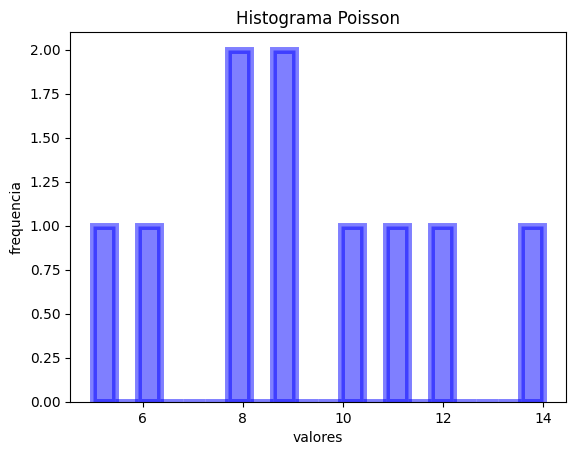

In [14]:
# histograma
plt.hist(dp, 20, color='b',lw=5,alpha=0.5, ec='b')
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Poisson')
plt.show()

In [11]:
arregloNum = []
arregloRi = []
arregloXi = []
arregloEvent = []

def results():
    print(60*'-')
    print('X\t\t 0 \t\t1')
    print(f'P(X)\t\t{(1-P0)}\t\t{P1}')
    print(f'P(X)\t\t{(1-P0)}\t\t',((1-P0)+P1))
    print('\n')
    print(60*'-')
    print('N°\t\tRi\t\tXi\t\tEvento')
    print(60*'-')
    for i in range(len(Ri)):
        res = 'No Falla' if Xi[i]== 0 else 'Falla'
        print(f'{(i+1)}\t\t{Ri[i]}\t\t{Xi[i]}\t\t{res}')
        arregloNum.append(i+1)
        arregloRi.append(Ri[i])
        arregloXi.append(Xi[i])
        arregloEvent.append(res)

In [12]:
data = pd.DataFrame({'N°':arregloNum,'Ri':arregloRi,'Xi':arregloXi,'Evento':arregloEvent})
writer = ExcelWriter('D:/SEMESTRE 13/PROBABILISTICOS/numerosAleatorios/Datos.xlsx')
data.to_excel(writer, 'Hoja de datos', index=False)
writer.save()

C:\Users\julia\AppData\Local\Temp\ipykernel_11464\1251865057.py:4: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


Continuos

In [13]:
R_i = meanSquare(7777,10,True)
histogram(R_i, txt='Pseudoaleatorios Continuos')
scatter(R_i,txt='Pseudoaleatorios Continuos')

INFO: 0. Seed Xo: 7777  Xo²: 60481729  Long: 8  pseudorandom: 4817  Random Ri: 0.4817
INFO: 1. Seed Xo: 4817  Xo²: 23203489  Long: 8  pseudorandom: 2034  Random Ri: 0.2034
INFO: 2. Seed Xo: 2034  Xo²: 04137156  Long: 7  pseudorandom: 1371  Random Ri: 0.1371
INFO: 3. Seed Xo: 1371  Xo²: 01879641  Long: 7  pseudorandom: 8796  Random Ri: 0.8796
INFO: 4. Seed Xo: 8796  Xo²: 77369616  Long: 8  pseudorandom: 3696  Random Ri: 0.3696
INFO: 5. Seed Xo: 3696  Xo²: 13660416  Long: 8  pseudorandom: 6604  Random Ri: 0.6604
INFO: 6. Seed Xo: 6604  Xo²: 43612816  Long: 8  pseudorandom: 6128  Random Ri: 0.6128
INFO: 7. Seed Xo: 6128  Xo²: 37552384  Long: 8  pseudorandom: 5523  Random Ri: 0.5523
INFO: 8. Seed Xo: 5523  Xo²: 30503529  Long: 8  pseudorandom: 5035  Random Ri: 0.5035
INFO: 9. Seed Xo: 5035  Xo²: 25351225  Long: 8  pseudorandom: 3512  Random Ri: 0.3512


NameError: name 'histogram' is not defined